In [31]:
import pandas as pd

# Load the CSV


df = pd.read_csv('Data2/BrunoCruz2_2025-06-23_11-41-55/name_age_sex_tennis-exp_vr-exp_racket-grip-base.csv')

In [32]:
df['hit'] = None

# Identify collisions ball and racket
hit_events = df['event'].str.contains('RacketHit', na=False)

# Mark hits 
df.loc[hit_events, 'hit'] = True
df.loc[~hit_events, 'hit'] = False

# Mark TrialStart
df['TrialStart'] = None
spawned_events = df['event'].str.contains('TrialStart', na=False)
df.loc[spawned_events, 'TrialStart'] = True
df.loc[~spawned_events, 'TrialStart'] = False

# Identify court collisions
df['Court_Enter'] = None
court_events = df['event'].str.contains('CourtEnter', na=False)
df.loc[court_events, 'Court_Enter'] = True
df.loc[~court_events, 'Court_Enter'] = False

# Identify Net collisions
df['Net_Enter'] = None
net_events = df['event'].str.contains('NetEnter', na=False)
df.loc[net_events, 'Net_Enter'] = True
df.loc[~net_events, 'Net_Enter'] = False

# Delete the Event column
df = df.drop(columns=['event'])

In [33]:
# Convert Pos and Rot columns to numeric, coercing errors
df[['time', 'position.x', 'position.y', 'position.z', 'rotation.x', 'rotation.y', 'rotation.z', 'rotation.w']] = df[['time', 'position.x', 'position.y', 'position.z', 'rotation.x', 'rotation.y', 'rotation.z', 'rotation.w']].apply(pd.to_numeric, errors='coerce')

In [34]:
# --- Dividir por stage ---
df_stage0 = df[df["stage"] == 1]
df_stage1 = df[df["stage"] == 3]
df_stage2 = df[df["stage"] == 4]

Plots Tragetorias around hit

listas com trajetorias de cada stage

In [35]:
# Parâmetro da janela (250 ms antes e depois)
WINDOW = 0.50

# Racket hits times
racket_hits0 = df_stage0[df_stage0['hit'] == True].sort_values('time')['time']
racket_hits1 = df_stage1[df_stage1['hit'] == True].sort_values('time')['time']
racket_hits2 = df_stage2[df_stage2['hit'] == True].sort_values('time')['time']


# --- Extrair trajetórias em torno do RacketHit para cada stage ---
trajetorias_stage0 = []
for hit_time in racket_hits0:
    # Get the trajectory around the hit time
    window_data = df_stage0[(df_stage0['time'] >= hit_time - WINDOW) & (df_stage0['time'] <= hit_time + WINDOW)]

    # Append the filtered positions to the list
    posicoes = window_data[["position.x", "position.y", "position.z"]].to_numpy()
    trajetorias_stage0.append(posicoes)

trajetorias_stage1 = []
for hit_time in racket_hits1:
    # Get the trajectory around the hit time
    window_data = df_stage1[(df_stage1['time'] >= hit_time - WINDOW) & (df_stage1['time'] <= hit_time + WINDOW)]

    # Append the filtered positions to the list
    posicoes = window_data[["position.x", "position.y", "position.z"]].to_numpy()
    trajetorias_stage1.append(posicoes)

trajetorias_stage2 = []
for hit_time in racket_hits2:
    # Get the trajectory around the hit time
    window_data = df_stage2[(df_stage2['time'] >= hit_time - WINDOW) & (df_stage2['time'] <= hit_time + WINDOW)]

    # Append the filtered positions to the list
    posicoes = window_data[["position.x", "position.y", "position.z"]].to_numpy()
    trajetorias_stage2.append(posicoes)

# tamanho das trajetórias do stage 2
tamanhos_stage1 = [traj.shape[0] for traj in trajetorias_stage2]
print(f"Tamanhos das trajetórias do stage 1: {tamanhos_stage1}")

Tamanhos das trajetórias do stage 1: [501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501, 501]


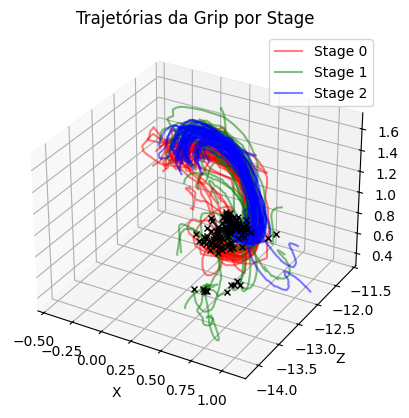

In [36]:
# --- Plot conjunto (todos os stages com cores diferentes) ---
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for traj in trajetorias_stage0:
    ax.plot(traj[:, 0], traj[:, 2], traj[:, 1], color='red', alpha=0.5, label='Stage 0' if traj is trajetorias_stage0[0] else "")
for traj in trajetorias_stage1:
    ax.plot(traj[:, 0], traj[:, 2], traj[:, 1], color='green', alpha=0.5, label='Stage 1' if traj is trajetorias_stage1[0] else "")
for traj in trajetorias_stage2:
    ax.plot(traj[:, 0], traj[:, 2], traj[:, 1], color='blue', alpha=0.5, label='Stage 2' if traj is trajetorias_stage2[0] else "")

# Add a black dot in the initial position of the racket for each trajectory
for traj in trajetorias_stage0:
    ax.plot(traj[0, 0], traj[0, 2], traj[0, 1], marker='x', color='black', markersize=5)

for traj in trajetorias_stage1:
    ax.plot(traj[0, 0], traj[0, 2], traj[0, 1], marker='x', color='black', markersize=5)

for traj in trajetorias_stage2:
    ax.plot(traj[0, 0], traj[0, 2], traj[0, 1], marker='x', color='black', markersize=5)

ax.set_title("Trajetórias da Grip por Stage")
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_zlabel("Y")
ax.legend()
plt.show()

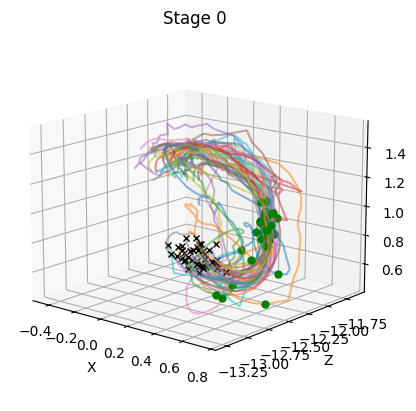

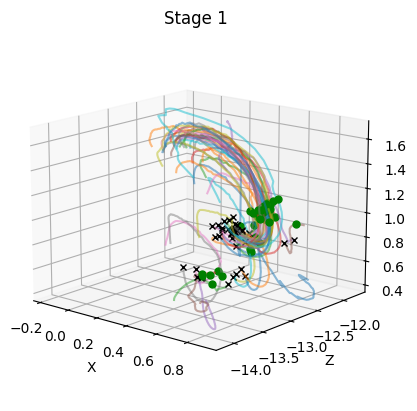

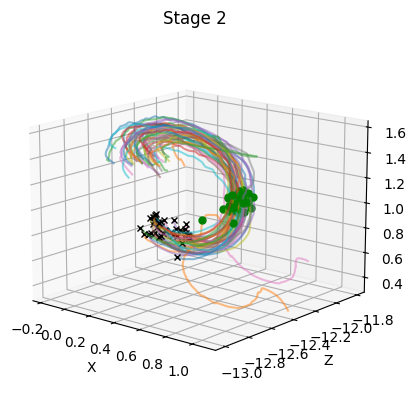

In [37]:
import matplotlib.pyplot as plt

# --- Plots separados por stage ---
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for traj in trajetorias_stage0:
    ax.plot(traj[:, 0], traj[:, 2], traj[:, 1], alpha=0.5)
    ax.plot(traj[0, 0], traj[0, 2], traj[0, 1], color='black', marker='x', markersize=5)
    ax.plot(traj[len(traj)//2, 0], traj[len(traj)//2, 2], traj[len(traj)//2, 1], color='green', marker='o', markersize=5)

ax.set_title("Stage 0")
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_zlabel("Y")
ax.view_init(elev=15, azim=-50)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for traj in trajetorias_stage1:
    ax.plot(traj[:, 0], traj[:, 2], traj[:, 1], alpha=0.5)
    ax.plot(traj[0, 0], traj[0, 2], traj[0, 1], color='black', marker='x', markersize=5)
    # point of impact
    ax.plot(traj[len(traj)//2, 0], traj[len(traj)//2, 2], traj[len(traj)//2, 1], color='green', marker='o', markersize=5)

ax.set_title("Stage 1")
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_zlabel("Y")
ax.view_init(elev=15, azim=-50)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for traj in trajetorias_stage2:
    ax.plot(traj[:, 0], traj[:, 2], traj[:, 1], alpha=0.5)
    ax.plot(traj[0, 0], traj[0, 2], traj[0, 1], color='black', marker='x', markersize=5)
    ax.plot(traj[len(traj)//2, 0], traj[len(traj)//2, 2], traj[len(traj)//2, 1], color='green', marker='o', markersize=5)
ax.set_title("Stage 2")
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_zlabel("Y")
ax.view_init(elev=15, azim=-50)
plt.show()

STAGE 2

In [38]:
import pandas as pd
import plotly.graph_objects as go

# Initialize interative plot for stage 2
fig = go.Figure()

# Add trajectories for stage 2
for traj in trajetorias_stage2:
    fig.add_trace(go.Scatter3d(
        x=traj[:, 0],
        y=traj[:, 2],
        z=traj[:, 1],
        mode='lines',
        line=dict(width=2, color='blue'),
        opacity=0.5
    ))

# Update layout for the interactive plot
fig.update_layout(
    title="Stage 2",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Z",
        zaxis_title="Y"
    ),
    width=800,
    height=600,
    showlegend=False
)
# Show the interactive plot
fig.show()




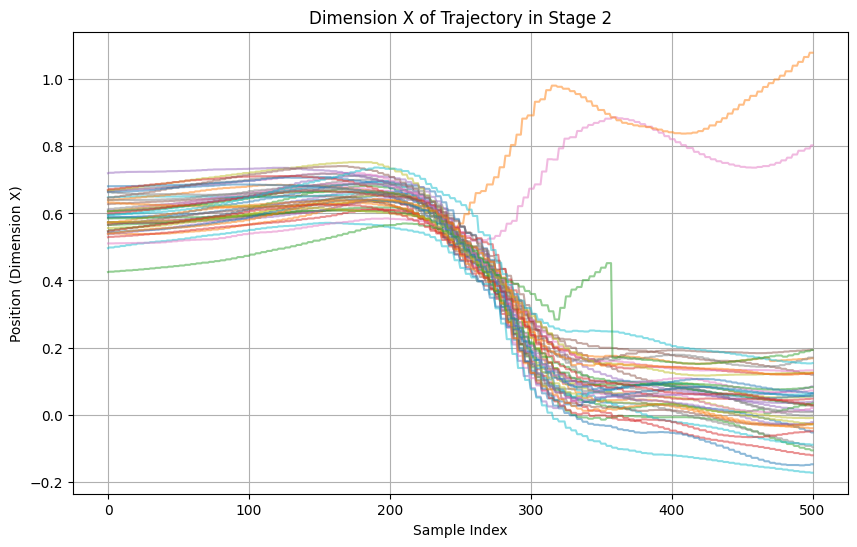

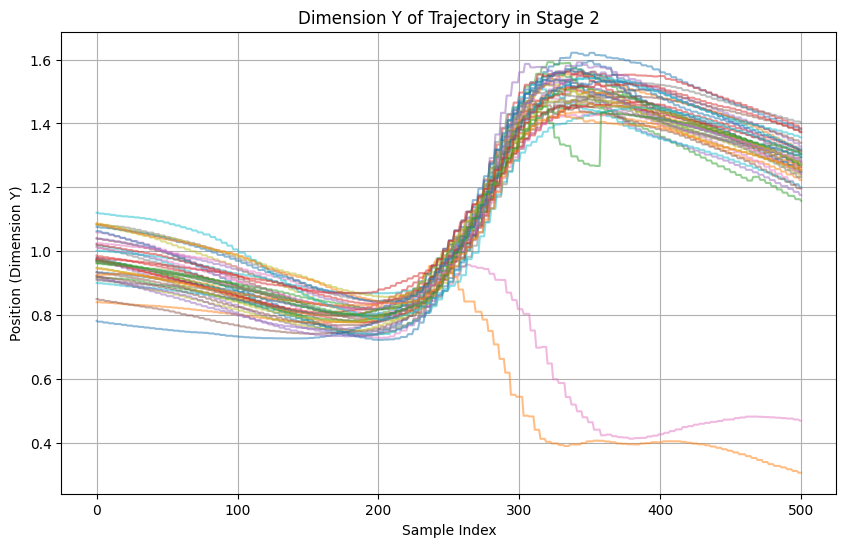

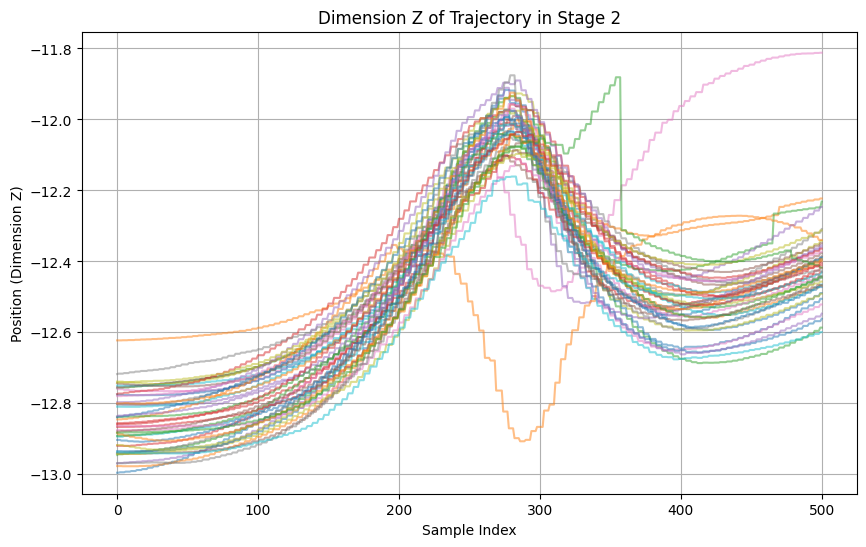

In [39]:
# Plot de cada dimensão stage 1
for dim in range(3):
    plt.figure(figsize=(10, 6))
    for traj in trajetorias_stage2:
        plt.plot(traj[:, dim], alpha=0.5)

    plt.title(f"Dimension {['X', 'Y', 'Z'][dim]} of Trajectory in Stage 2")
    plt.xlabel("Sample Index")
    plt.ylabel(f"Position (Dimension {['X', 'Y', 'Z'][dim]})")
    #plt.ylim(-1, 1)
    plt.grid()
    plt.show()

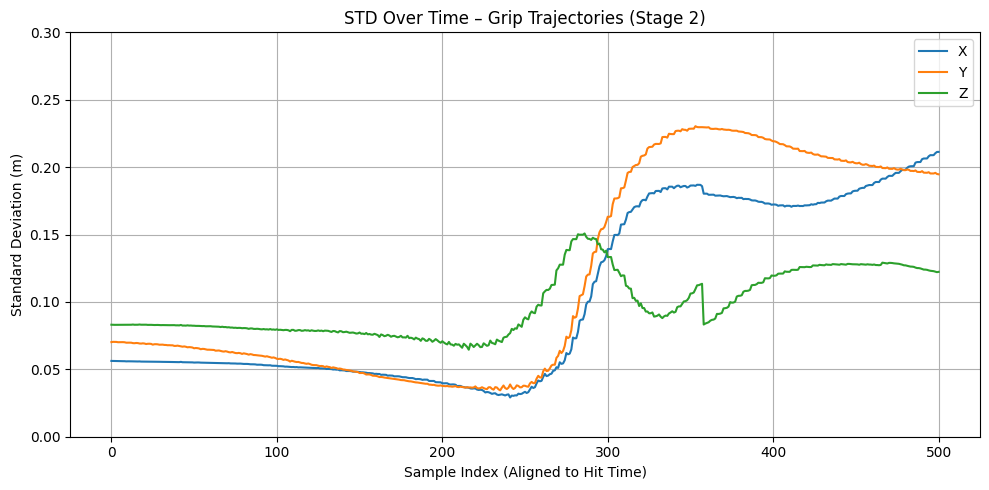

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Convert list of [n_samples x 3] arrays into one array [n_trials x n_samples x 3]
trajectories_array = np.stack(trajetorias_stage2)  # shape: [n_trials, n_samples, 3]

dim_labels = ['X', 'Y', 'Z']

plt.figure(figsize=(10, 5))

# For each dimension
for dim in range(3):
    std_over_time = np.std(trajectories_array[:, :, dim], axis=0)
    plt.plot(std_over_time, label=f'{dim_labels[dim]}')

plt.title('STD Over Time – Grip Trajectories (Stage 2)')
plt.xlabel('Sample Index (Aligned to Hit Time)')
plt.ylabel('Standard Deviation (m)')
plt.legend()
plt.ylim(0, 0.3)  # Adjust as needed
plt.grid()
plt.tight_layout()
plt.show()


Path-Length normalization

/var/folders/5g/t8kckpys61zdtmy3jx9lt0z00000gn/T/ipykernel_95668/3030613887.py:21: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



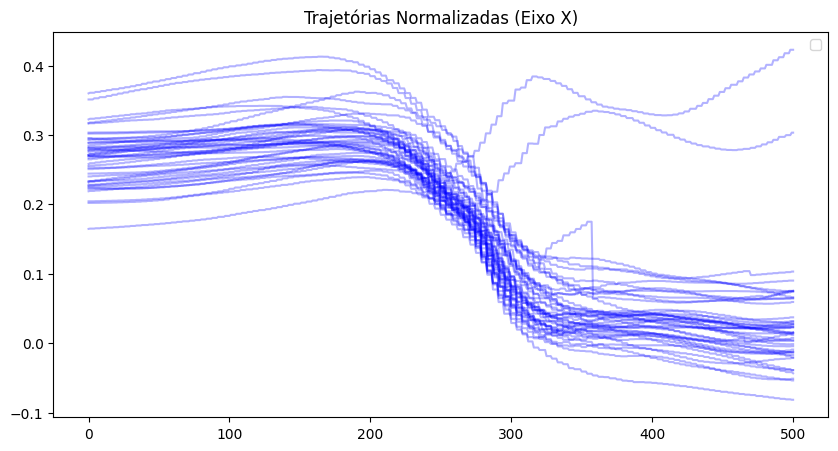

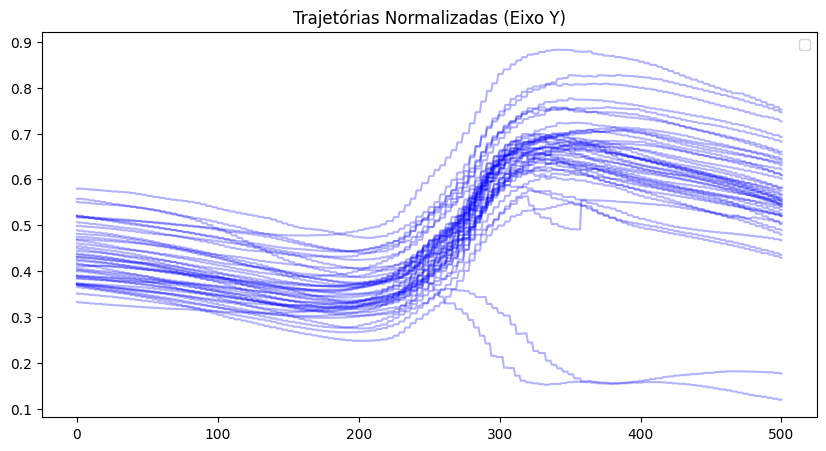

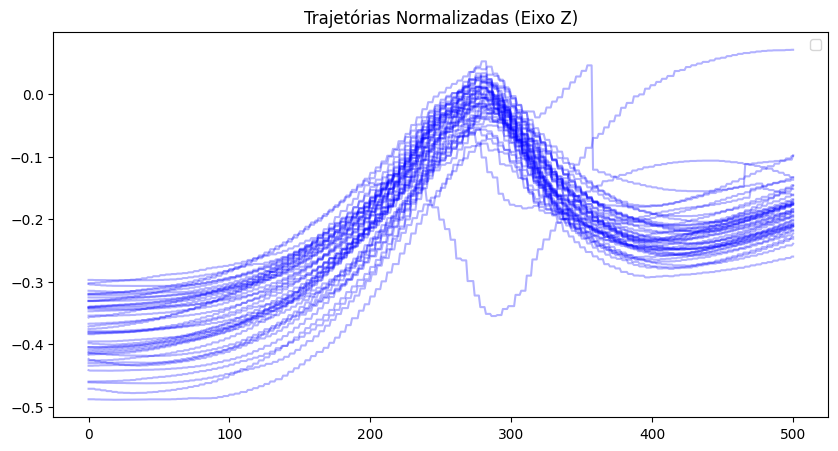

In [41]:
import numpy as np
normalized_trajectories_pl = []

for traj in trajetorias_stage2:  # traj: [n_samples, 3]
    # ad 12 to Z
    traj[:, 2] += 12
    diffs = np.diff(traj, axis=0)
    distances = np.linalg.norm(diffs, axis=1)
    path_length = np.sum(distances)

    normalized = traj / path_length
    normalized_trajectories_pl.append(normalized)

import matplotlib.pyplot as plt

for i in range(3):
    plt.figure(figsize=(10, 5))
    for traj in normalized_trajectories_pl:
        plt.plot(traj[:, i], alpha=0.3, color="blue")  # PosX, PosY, PosZ
    plt.title(f"Trajetórias Normalizadas (Eixo {['X', 'Y', 'Z'][i]})")
    plt.legend()
    plt.show()

Z score

/var/folders/5g/t8kckpys61zdtmy3jx9lt0z00000gn/T/ipykernel_95668/3553588352.py:24: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



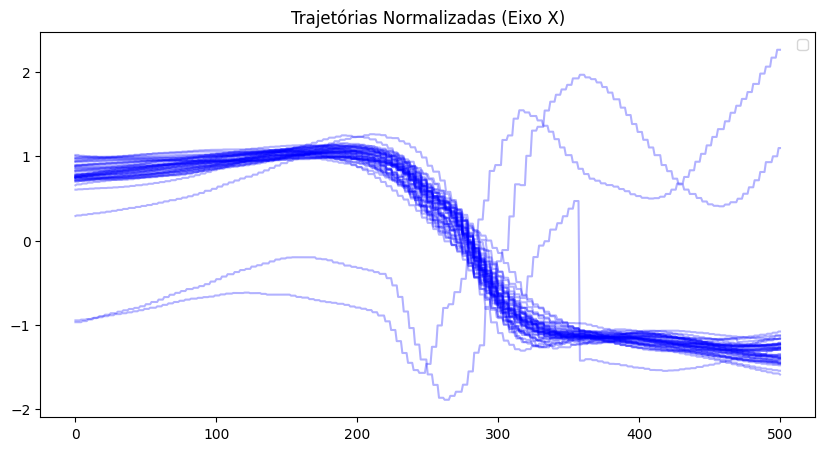

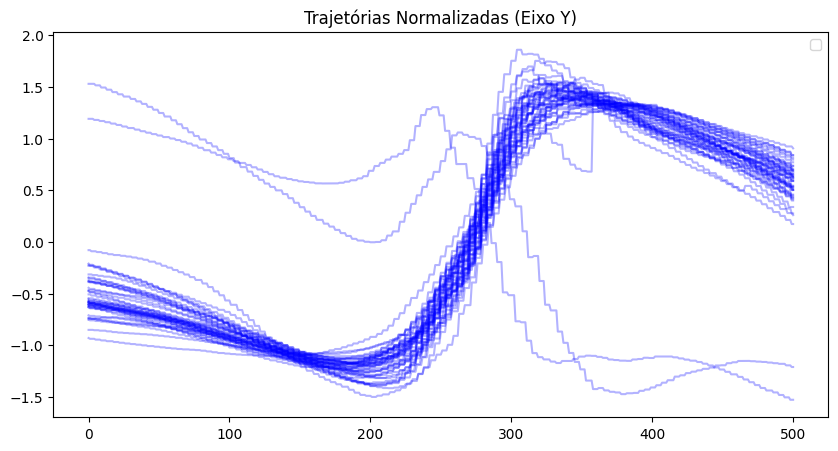

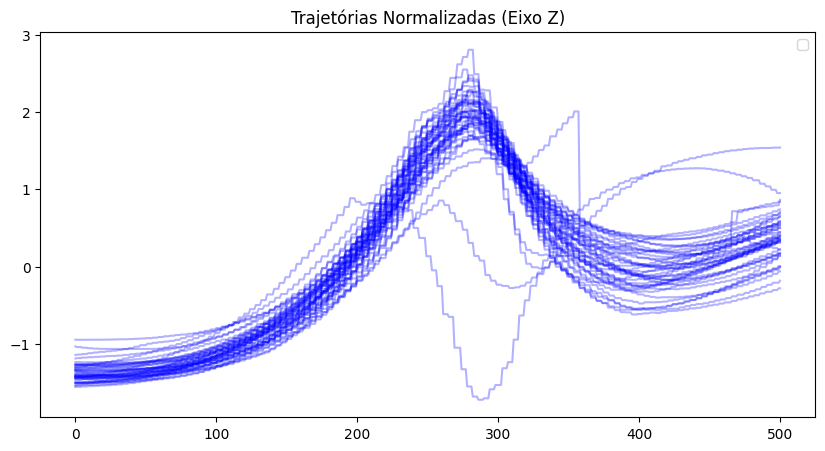

In [42]:
import numpy as np

normalized_trajectories_zscore = []

for traj in trajetorias_stage2:
    
    # Compute mean and std for each axis
    mean = np.mean(traj, axis=0)  # shape: (3,)
    std = np.std(traj, axis=0)    # shape: (3,)

    # Avoid division by zero in case any std is zero
    std[std == 0] = 1e-8
    
    # Apply z-score normalization
    z_scored = (traj - mean) / std  # shape: [n_samples, 3]

    normalized_trajectories_zscore.append(z_scored)

for i in range(3):
    plt.figure(figsize=(10, 5))
    for traj in normalized_trajectories_zscore:
        plt.plot(traj[:, i], alpha=0.3, color="blue")  # PosX, PosY, PosZ
    plt.title(f"Trajetórias Normalizadas (Eixo {['X', 'Y', 'Z'][i]})")
    plt.legend()
    plt.show()

Z score normalization

In [43]:
import numpy as np

# Stack de todas as trajetórias (shape: [n_total_points, 3])
all_points = np.vstack(trajetorias_stage2)  # ex: todas do stage 0

# Média e desvio padrão por dimensão
global_mean = np.mean(all_points, axis=0)  # shape: (3,)
global_std = np.std(all_points, axis=0)    # shape: (3,)

# Normalizar cada trajetória (z-score por eixo)
normalized_trajectories_zscore_global = [(traj - global_mean) / global_std for traj in trajetorias_stage2]


/var/folders/5g/t8kckpys61zdtmy3jx9lt0z00000gn/T/ipykernel_95668/1597456428.py:8: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



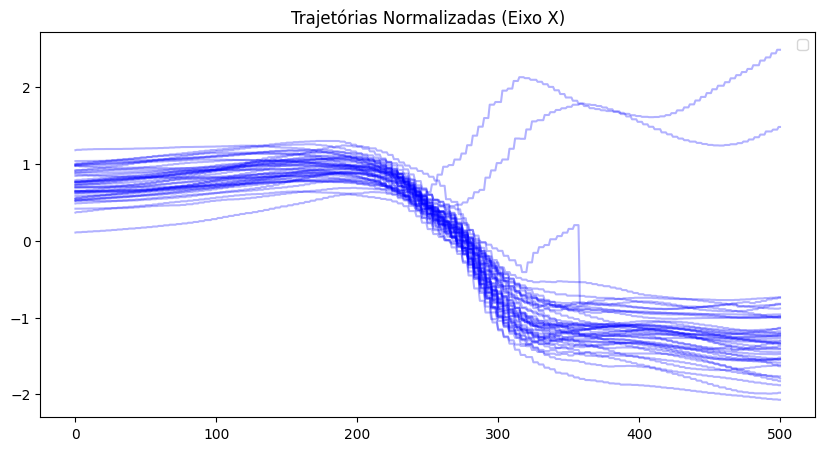

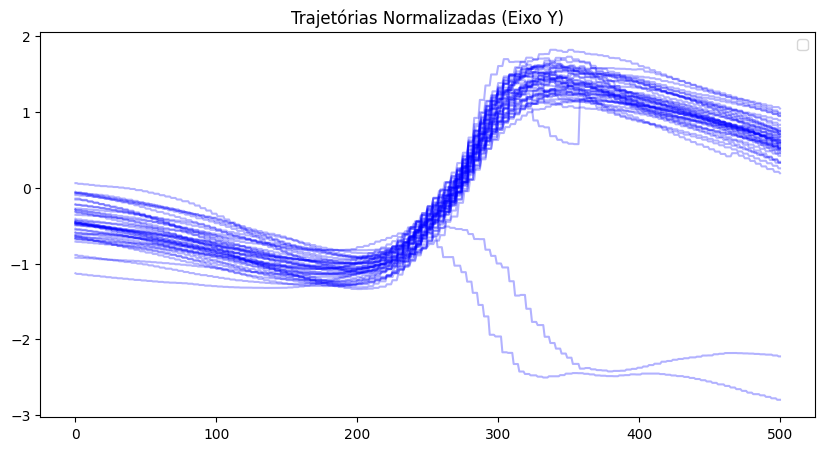

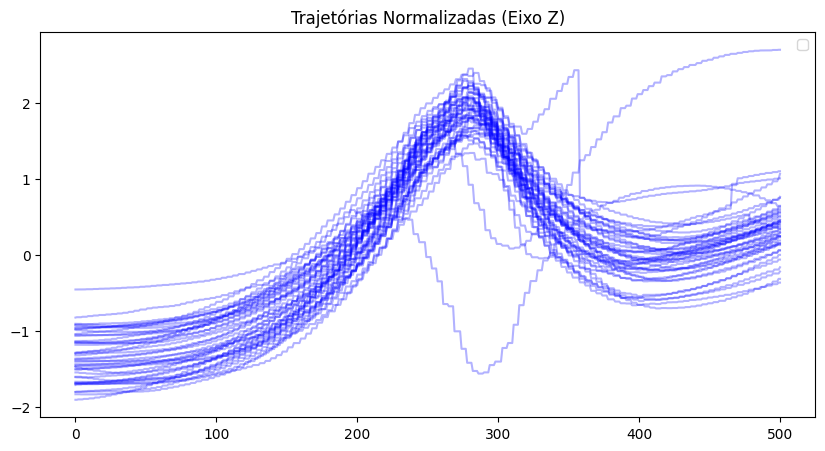

In [44]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.figure(figsize=(10, 5))
    for traj in normalized_trajectories_zscore_global:
        plt.plot(traj[:, i], alpha=0.3, color="blue")  # PosX, PosY, PosZ
    plt.title(f"Trajetórias Normalizadas (Eixo {['X', 'Y', 'Z'][i]})")
    plt.legend()
    plt.show()

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error

norm_list = [normalized_trajectories_pl, normalized_trajectories_zscore, normalized_trajectories_zscore_global]

for i in range(3):
    
    norm = norm_list[i]

    norm = np.array(norm)  # Convert list of arrays to a 3D numpy array: [n_trials, n_samples, 3]
    # Then recalculate the mean trajectory
    mean_traj = np.mean(norm, axis=0)

    # Euclidean MSE per trajectory
    mse_list2 = [np.mean(np.sum((traj - mean_traj) ** 2, axis=1)) for traj in norm]
    print(f'{["path_lengh", "z-score", "z-score global"][i]}')
    print(f"Mean MSE (euclidiana): {np.mean(mse_list2):.6f}")
    print(f"Std Dev MSE: {np.std(mse_list2):.6f}")

    # RMSE
    rmse_list = [np.sqrt(mse) for mse in mse_list2]
    print(f'{["path_lengh", "z-score", "z-score global"][i]}')
    print(f"RMSE médio: {np.mean(rmse_list):.6f}")
    print(f"Std Dev RMSE: {np.std(rmse_list):.6f}")

# without normalization
mse_list = []
for traj in trajetorias_stage2:
    # Calculate the mean trajectory
    mean_traj = np.mean(traj, axis=0)
    # Calculate the Euclidean MSE
    mse = np.mean(np.sum((traj - mean_traj) ** 2, axis=1))
    mse_list.append(mse)

print("Without normalization:")
print(f"Mean MSE (euclidiana): {np.mean(mse_list):.6f}")
print(f"Std Dev MSE: {np.std(mse_list):.6f}")
# RMSE
rmse_list = [np.sqrt(mse) for mse in mse_list]
print(f"RMSE médio: {np.mean(rmse_list):.6f}")
print(f"Std Dev RMSE: {np.std(rmse_list):.6f}")


path_lengh
Mean MSE (euclidiana): 0.013427
Std Dev MSE: 0.028238
path_lengh
RMSE médio: 0.090738
Std Dev RMSE: 0.072069
z-score
Mean MSE (euclidiana): 0.438589
Std Dev MSE: 1.594758
z-score
RMSE médio: 0.400261
Std Dev RMSE: 0.527617
z-score global
Mean MSE (euclidiana): 0.595531
Std Dev MSE: 1.850519
z-score global
RMSE médio: 0.541908
Std Dev RMSE: 0.549424
Without normalization:
Mean MSE (euclidiana): 0.204949
Std Dev MSE: 0.038163
RMSE médio: 0.450734
Std Dev RMSE: 0.042277
